In [250]:
from itertools import count

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [251]:
df = pd.read_csv("dataset.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


1. Quante sono le istanze contenute nel dataset?

In [252]:
df.shape[0]

7043

Il dataset è completo (cioè per ogni istanza tutti i valori di ogni attributo sono sempre correttamente specificati – non esistono “missing values”)?

In [253]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 Il dataset è bilanciato per quanto riguarda la classe da predire?

In [254]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

2. Verificare se i clienti con contratto a lungo termine (Contract="Two year") hanno in media una spesa mensile (MonthlyCharges) inferiore rispetto a quelli con contratti mensili o annuali. (punti 2)

In [255]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [256]:
df.groupby("Contract")["MonthlyCharges"].mean()

Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64

Però così confronto tutte e 3 le tipologie, ma io voglio solo breve vs lungo, quindi gli altri due gruppi vanno insieme, quindi faccio:

In [257]:
a_lungo_termine = df[df["Contract"] == "Two year"]
a_breve_termine = df[df["Contract"] != "Two year"]
print(a_lungo_termine["MonthlyCharges"].mean())
print(a_breve_termine["MonthlyCharges"].mean())

60.77041297935103
66.02669222139117


3. Discretizzare tenure (anzianità del cliente) in 3 gruppi (bassa, media, alta). Creare una tabella pivot che mostri la percentuale di abbandono (Churn) per gruppo di anzianità e tipo di contratto. I clienti con anzianità bassa e contratto mensile hanno una probabilità maggiore di abbandonare? (punti 3)

In [258]:
df["tenure_group"] = pd.cut(df["tenure"], bins=3, labels=["bassa", "media", "alta"])
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

pivot = pd.pivot_table(
    df,
    values="Churn",
    index="tenure_group",
    columns="Contract",
    aggfunc="mean"
)
pivot = pivot * 100
pivot

/var/folders/d5/jd8cs2ds0lq81wp6tr68x7800000gn/T/ipykernel_11624/703326523.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(


Contract,Month-to-month,One year,Two year
tenure_group,,,
bassa,47.674844,9.034268,0.000000
media,32.917706,10.617761,2.189781
alta,26.023392,12.933754,3.325416


4. Determinare se l’adozione di almeno un servizio extra (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) riduce il tasso di abbandono. (punti 2) Creare una nuova feature che conta il numero di servizi aggiuntivi attivi per cliente e verificare con un grafico se il tasso di abbandono diminuisce all’aumentare del numero di servizi attivi. (punti 2)

In [259]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
for col in cols:
    df[col] = df[col].map({"Yes": 1, "No": 0, "No internet service":0})

df["Extra"] = (df["OnlineSecurity"] == 1) | (df["OnlineBackup"] == 1) | (df["DeviceProtection"] == 1) | (
            df["TechSupport"] == 1) | (df["StreamingTV"] == 1) | (df["StreamingMovies"] == 1)


print(df[df["Extra"] == True]["Churn"].mean())
df.head(5)

0.28897180762852404


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,Extra
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,0,...,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0,bassa,True
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,1,...,0,0,One year,No,Mailed check,56.95,1889.5,0,media,True
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,1,...,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1,bassa,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,1,...,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,0,media,True
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,0,...,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1,bassa,False


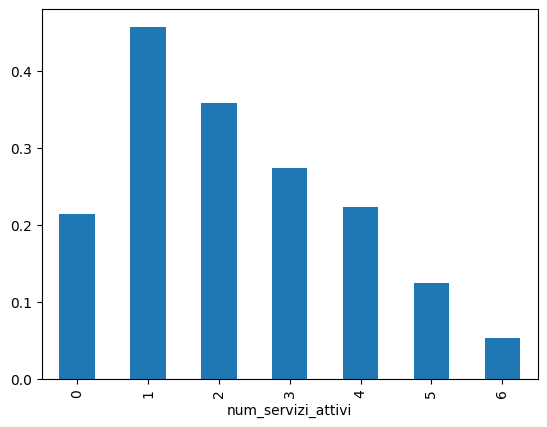

In [260]:
df["num_servizi_attivi"] = df[cols].sum(axis=1)
df.groupby('num_servizi_attivi')["Churn"].mean().plot(kind="bar")
plt.show()

# 2.
